<h1> EXPLORATORY DATA ANALYSIS - PROJECT

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Matches during this 10 years of IPL matches](#section401)<br/>
    - 4.2 [Which are the best teams in each IPL seasons?](#section402)<br/>
    - 4.3 [Which are the worst performing teams in each IPL seasons?](#section403)<br/>
    - 4.4 [Most Valuable players in IPL history](#section404)<br/>
    - 4.5 [Does the toss decision have any role on deciding the winner of the match?](#section405)<br/>
    - 4.6 [Which is the dangerous bowling teams to play with ?](#section406)<br/>
    - 4.7 [Which is the most dangerous batting teams to play with ?](#section407)<br/>
    - 4.8 [Which is the overall BEST teams in the history of IPL ?](#section408)<br/>
    - 4.9 [What is the probability of winning if the opposite team is one amoung the best teams](#section409)<br/>
    - 4.10 [Does climate have any effect on the match flow?](#section410)<br/>
    - 4.11 [Hypothesis: Factors that effect the IPL match result](#section411)<br/>
    
5. [Conclusions](#section5)<br/>  

### 1. Problem Statement

Factors based on which the result of a Cricket Matches depends. 
   
   - Toss Decision
   - Venue -- Batting Pitch or a Balling Pitch?
   - Teams
   - Players
   - Climate
   - Or is it a mere luck? (No Way!!)
   
We will dig deep into the 10 years of data of an IPL Match to infer an idea on what all factors does a Cricket Match results depends. 

### 2. Data Loading and Description

- The dataset consists of the information about the IPL Matches from the past 10 years (2008-2018). It gives information about the teams played, season, winner, toss decision, man of the match , venue etc. 
- The dataset comprises of __693 observations and 14 columns__.Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| id            | Id Number                                                 | 
| Season        | IPL Season                                                |  
| city          | City in which the tournament was played                   | 
| date          | Date on which the tournament was played                   |   
| team1         | 1st team who played the match                             |
| team2         | 2nd team who played the match                             |
| toss_winner   | Team who won the toss                                     |
| toss_decision | Decision of the toss winner (Batting/Bowling?)           |
| result        | Result was normal or the match went on tie                |
| dl_applied    | Information on whether the decision was according to DL Rule |
| winner        | Winner of the match                                       |
| win_by_runs   | By how many runs the winner team have won the match  |
| win_by_wickets| By how many wickets the winner team have won the match  |
| player_of_match | Gives Information about the player who won the Man of the Match title |
| venue         | Stadium where the tournament was played                   |
| umpire1      | Name of the 1st Umpire |
| umpire2     | Name of the 2nd Umpire |
| umpire3      | Name of the 3rd umpire |

#### Some Background Information
The __Indian Premier League (IPL)__ is a professional Twenty20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008 in India contested during March or April and May of every year by eight teams representing eight different cities in India. After 2 matches played by each team, there would be 2 Qualifiers and 1 Eliminator round, from which teams for the Final round is decided.Each team is owned by different owners and multiple stakeholders. Sometimes, this changes every year. This ownership takes players to the team through Auction. 


#### Importing packages                                          

In [135]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



#### Importing the Dataset

In [2]:
matches = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## 3. Data Profiling

### 3.1 Understanding the Dataset

In [3]:
matches.shape

(696, 18)

Dataset has 696 rows and 18 columns

In [4]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


Total __696 observations__ should be there in each column. But we could see that, there are __missing values__ in some columns.

In [6]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

We found that the columns city,winner,player_of_match,umpire details have null values. Have to take care of those columns separately.

In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


### 3.2 Pre Profiling

In [8]:
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(outputfile="matches_before_preprocessing.html")

Observations:
    
    1. 'City' has 7 missing data, but since we have details about the venue , city doent have much importance. We can remove those columns.
    2. Umpire details can be removed as that wont affect the result much. Before the invention of new technologies, umpire decision was final, we could have checked if there is any bias to any team for any umpires. But now, they have role only during the match.
    3. Need to analyse whether climate change affected the match result after applying the DL rule. 
    4. Need to check the 'result' column as there are 3 rows having no result and 7 matches with tie, which wont help in the analysis. 
    
We have to clean our data such that only relevant data would be present for the Analysis.

### 3.3 Preprocessing

- __Removal of Umpire Details and city__

In [9]:
matches = matches.drop(['umpire1','umpire2','umpire3','city'],axis=1)

- __Removal of those matches containing no result__

In [10]:
id_todrop = list(matches[matches['result']=='no result'].index)
id_todrop
matches = matches.drop(id_todrop,axis=0)

- __Checking for duplicate data__

In [11]:
matches.team1.value_counts()

Mumbai Indians                 91
Kings XI Punjab                84
Chennai Super Kings            83
Royal Challengers Bangalore    75
Kolkata Knight Riders          74
Delhi Daredevils               70
Rajasthan Royals               62
Sunrisers Hyderabad            55
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Rising Pune Supergiants         7
Kochi Tuskers Kerala            7
Name: team1, dtype: int64

We found that, __Rising Pune Supergiant__ has a __duplicate__ value. We need to remove it in the all respective columns like team1,team2,toss_winner,winner. 

In [369]:
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['winner'] = matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['toss_winner'] = matches['toss_winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

- __Converting date to proper datetime format__

In [14]:
matches.date = pd.to_datetime(matches['date'])

In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 695
Data columns (total 14 columns):
id                 693 non-null int64
season             693 non-null int64
date               693 non-null datetime64[ns]
team1              693 non-null object
team2              693 non-null object
toss_winner        693 non-null object
toss_decision      693 non-null object
result             693 non-null object
dl_applied         693 non-null int64
winner             693 non-null object
win_by_runs        693 non-null int64
win_by_wickets     693 non-null int64
player_of_match    693 non-null object
venue              693 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 81.2+ KB


Removed all irrelevant data and thus the data is cleaned. Can proceed with the real data analysis.

## 3.4 Post Pandas Profiling

In [16]:
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(outputfile="matches_after_preprocessing.html")

Initial Analysis :
    
    1. Gayle,ABD,Pathan have won the 'Player of the Match' title most number of times in 10 seasons. So he is a good asset to the team.
    2. Toss Decision was mostly Fielding (59%) than Batting (40%).  
    3. Mumbai Indians had the "luck" to be the toss winner most of the time. Did it helped them?Lets check.    
    4. Mumbai Indians had won more number of matches (Guess, toss winning have helped them much!!)

We have to dig deep into the data to get a detailed analysis and infer a conclusion. 

### 4. Questions

### 4.1 Matches during this 10 years of IPL matches.

In [71]:
matches.columns

Index(['id', 'season', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'Most Valuable players'],
      dtype='object')

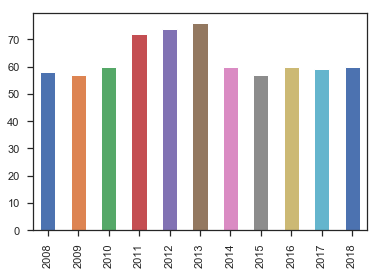

In [370]:
matches.season.value_counts().sort_index().plot.bar()

From the graph, we could observe that the matches were more during the seasons 2011-2013. We will see, how many teams were present during each season to know whether the teams were more during these seasons or the matches per team had increased. 

In [116]:
seasons =list(matches.season.unique())
grouped_match = matches.groupby(['season','team1']).count().reset_index()
grouped_match.head(5)

,season,team1,id,date,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Most Valuable players
0,2008,Chennai Super Kings,9,9,9,9,9,9,9,9,9,9,9,9,9
1,2008,Deccan Chargers,8,8,8,8,8,8,8,8,8,8,8,8,8
2,2008,Delhi Daredevils,6,6,6,6,6,6,6,6,6,6,6,6,6
3,2008,Kings XI Punjab,7,7,7,7,7,7,7,7,7,7,7,7,7
4,2008,Kolkata Knight Riders,9,9,9,9,9,9,9,9,9,9,9,9,9


Now, we have grouped the data according to each season and teams which will be helpful for a deeper analysis. 

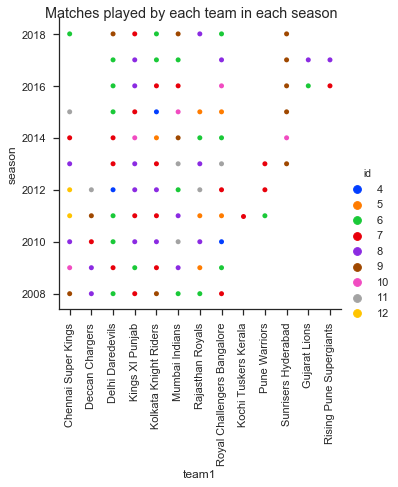

In [371]:
#fig, ax = plt.subplots(1)
sns.set(style="ticks")
ax = sns.catplot(x="team1", y="season", hue="id", data=grouped_match,kind="swarm",palette="bright")
ax.fig.suptitle('Matches played by each team in each season')
for ax in ax.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
#ax.set_xlim(0, 1000)


Observations from the Graph :
    
- __Chennai Super Kings__ and __Rajasthan Royals__ have __not played__ during __2015 and 2016__ seasons due to some reasons.


- The team __Deccan Chargers__ have played only from __2008-2012__.


- __Kochi Tuskers__ team have seen IPL __only once__ in the history of IPL, which was in the season-__2011__.


- __Pune Warriors__ managed to be on the IPL team list for 3 seasons (__2011,2012,2013__).


- __Sunrisers Hyderabad__ team have __formed__ from the year __2013__.


- There were few teams, __Gujarat Lions__ and __Rising Pune Supergiants__ also had a very small span of IPL history (__2016 and 2017__).


- Rest all teams managed to be on the IPL team list from the year it started.


- The reason behind more matches during the season 2011-2013 is due to the increase in teams. 

### 4.2 Which are the best teams in each IPL seasons?

In [372]:
grouped_winners = matches.groupby(['season','winner']).count().reset_index()
grouped_winners.head(2)

,season,winner,id,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,Most Valuable players
0,2008,Chennai Super Kings,9,9,9,9,9,9,9,9,9,9,9,9,9
1,2008,Deccan Chargers,2,2,2,2,2,2,2,2,2,2,2,2,2


Now, we have grouped the season with the winners.

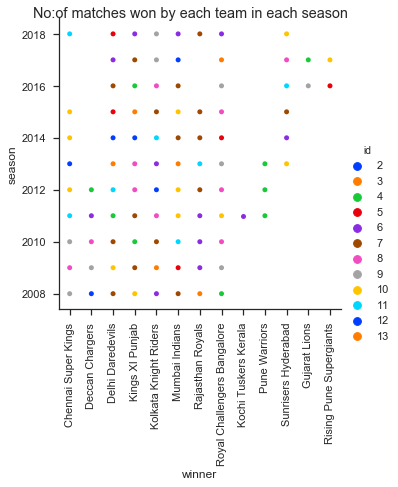

In [373]:
sns.set(style="ticks")
ax = sns.catplot(x="winner", y="season", hue="id", data=grouped_winners,kind="swarm",palette="bright")
ax.fig.suptitle('No:of matches won by each team in each season')
for ax in ax.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Observations :
    
- Few teams have __won very few matches__ less than 4 in some seasons. 


- Some teams have __outperformed__ as a consistent winners in few seasons. 

Will check, which are the best teams in each season.

In [357]:
max_winning_teams = grouped_winners[grouped_winners.id >=9][['winner','season','id']]
list(max_winning_teams['winner'].unique())


['Chennai Super Kings',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Royal Challengers Bangalore',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Sunrisers Hyderabad',
 'Gujarat Lions',
 'Rising Pune Supergiant']

These teams were playing well during the last 10 IPL seasons. Will dig deep into how many matches they have played. 

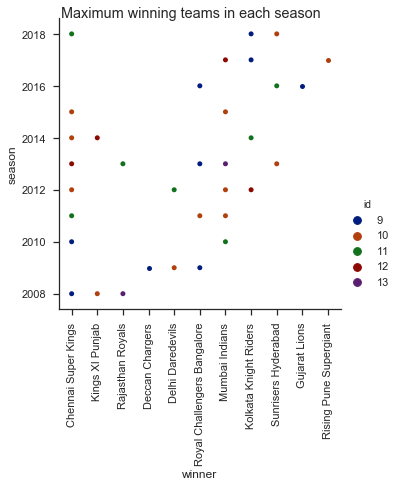

In [374]:
sns.set(style="ticks")
ax = sns.catplot(x="winner", y="season", hue="id", data=max_winning_teams,kind="swarm",palette="dark")
ax.fig.suptitle('Maximum winning teams in each season')
for ax in ax.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Observations :
    
- __Chennai Super Kings__, have been __very consistent__ on being the __top performer__ except on the season 2009 and the seasons they were absent.


- Followed by __Mumbai Indians, Kolkata Knight Riders and Royal Challengers Bangalore__ being __consistent performers__ on most of the seasons they played.

### 4.3 Which are the worst performing teams in each IPL seasons?

In [375]:
worst_teams = grouped_winners[grouped_winners.id <= 4][['winner','season','id']]
list(worst_teams['winner'].unique())


['Deccan Chargers',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Pune Warriors',
 'Gujarat Lions']

These teams had the worst performance in the past IPL seasons. Now we will see, how many matches they have won during each season.

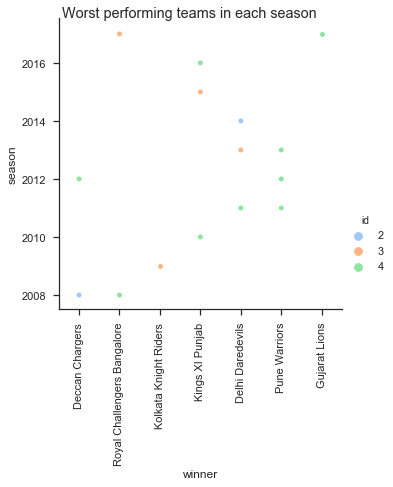

In [376]:
sns.set(style="ticks")
ax = sns.catplot(x="winner", y="season", hue="id", data=worst_teams,kind="swarm",palette="pastel")
ax.fig.suptitle('Worst performing teams in each season')
for ax in ax.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Observations :

- __Pune Warriors__ have won only 4 matches consistently during the seasons they have played which might be the reason for wipping out the team from the next IPL seasons.


- Decline of the teams __Pune Warriors,Gujarat Lions,Deccan Chargers__ were due to their __bad performance__ in the past IPL seasons.


- Surprisinly, even __Royal Challengers Bangalore__ who are amoung the top IPL teams, had performed __worst in 2 IPL__ seasons.

### 4.4 Most Valuable players in IPL history

In [377]:
grouped_players = matches.groupby(['season','winner','player_of_match']).count().reset_index()
grouped_players.head(2)

,season,winner,player_of_match,id,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,venue,Most Valuable players
0,2008,Chennai Super Kings,JDP Oram,1,1,1,1,1,1,1,1,1,1,1,1
1,2008,Chennai Super Kings,L Balaji,1,1,1,1,1,1,1,1,1,1,1,1


In [378]:
valuable_players = grouped_players[grouped_players.id >3][['player_of_match','winner','season','id']]
list(valuable_players['player_of_match'])

['SE Marsh',
 'SR Watson',
 'YK Pathan',
 'SR Tendulkar',
 'CH Gayle',
 'CH Gayle',
 'MEK Hussey',
 'A Mishra',
 'GJ Maxwell',
 'DA Warner',
 'RG Sharma',
 'AB de Villiers',
 'V Kohli',
 'Rashid Khan']

These are the best players of the IPL matches held. Now we will see, how they have performed individually and as a team.

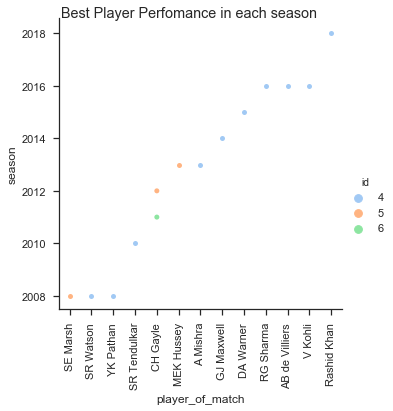

In [379]:
sns.set(style="ticks")
ax = sns.catplot(x="player_of_match", y="season", hue="id", data=valuable_players,kind="swarm",palette="pastel")
ax.fig.suptitle('Best Player Perfomance in each season')
for ax in ax.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Observations :
    
- __CH Gayle__ is the __best player__ who have been __player of the match__ more than 5 times in both 2011,2012 IPL seasons. And he is the only player who have got Man of the Match 6 times in the IPL season 2011.


- Most of the other best players has won the title 4 times in each season


Now we will see, these players belong to which teams.

In [219]:
valuable_players[valuable_players['id']>=4][['winner','player_of_match','season']]

,winner,player_of_match,season
18,Kings XI Punjab,SE Marsh,2008
33,Rajasthan Royals,SR Watson,2008
35,Rajasthan Royals,YK Pathan,2008
115,Mumbai Indians,SR Tendulkar,2010
178,Royal Challengers Bangalore,CH Gayle,2011
231,Royal Challengers Bangalore,CH Gayle,2012
232,Chennai Super Kings,MEK Hussey,2013
273,Sunrisers Hyderabad,A Mishra,2013
286,Kings XI Punjab,GJ Maxwell,2014
353,Sunrisers Hyderabad,DA Warner,2015


All players belong to the best teams, which is one of the reason to become the best teams. Definitely, they are giving value to the team and as individuals.

### 4.5 Does the toss decision have any role on deciding the winner of the match?

In [223]:
total_matches = matches.id.count()
total_matches

693

In [222]:
(matches.toss_decision.value_counts()/matches.id.count())*100

field    59.307359
bat      40.692641
Name: toss_decision, dtype: float64

In [383]:
(matches[matches['toss_winner']==matches['winner']].id.count()/total_matches)*100

51.515151515151516

51% toss_winner decision have probabitlity of win. Now we will see , out of this 51%, which decision have more probability of winning.

In [381]:
(matches[matches['toss_winner']==matches['winner']].toss_decision.value_counts()/matches[matches['toss_winner']==matches['winner']].id.count())*100

field    63.865546
bat      36.134454
Name: toss_decision, dtype: float64

Text(0.5, 1.0, 'Probability of winning depending on toss decision')

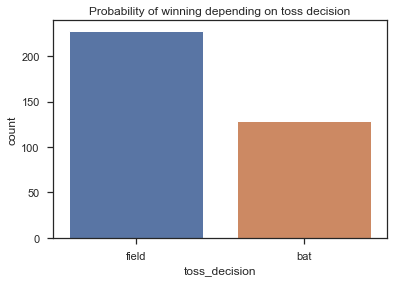

In [382]:
sns.countplot(x='toss_decision', data=matches[matches['toss_winner']==matches['winner']]).set_title('Probability of winning depending on toss decision')

In [229]:
grouped_toss_venue = matches.groupby(['venue','toss_decision','toss_winner','winner']).count().reset_index()
grouped_toss_venue.head(2)

,venue,toss_decision,toss_winner,winner,id,season,date,team1,team2,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,Most Valuable players
0,Barabati Stadium,bat,Deccan Chargers,Deccan Chargers,2,2,2,2,2,2,2,2,2,2,2
1,Barabati Stadium,field,Chennai Super Kings,Kings XI Punjab,1,1,1,1,1,1,1,1,1,1,1


In [384]:
toss_venue = grouped_toss_venue[(grouped_toss_venue.winner == grouped_toss_venue.toss_winner) & (grouped_toss_venue.id > 2)][['venue','toss_winner','toss_decision','id']]
list(toss_venue.venue.unique())

['Barabati Stadium',
 'Brabourne Stadium',
 'Eden Gardens',
 'Feroz Shah Kotla',
 'Holkar Cricket Stadium',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sawai Mansingh Stadium',
 'Subrata Roy Sahara Stadium',
 'Wankhede Stadium']

So, at these venues listed above, the team who won the toss have won the game. Lets check, whether this have any relation with the toss decision. 

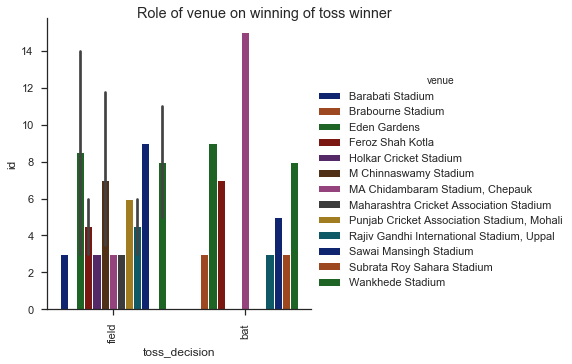

In [385]:
sns.set(style="ticks")
ax = sns.catplot(x="toss_decision", y="id", hue="venue", data=toss_venue,kind="bar",palette="dark")
ax.fig.suptitle('Role of venue on winning of toss winner')
for ax in ax.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Observations :
    
- __MA Chidambaram Stadium, Chepauk__ can be called as a __batting pitch__ as more than 14 times, the teams who have decided to bat have won the match. Whereas, teams who have decided to ball have won only 3 times. 


- __Wankhade Stadium__ and __Eden Gardens__ venues are __neutral pitch__ , teams have won almost equally independent of the toss decision.


- Even __Brabourne Stadium__ has more winning history for the one who batted first. It can also be called as __batting pitch__.


- __Rajiv Gandhi International Stadium, Uppal__ is a __bowling pitch__, the teams who have decided to field first have more probability to win than those who decided to bat.

### 4.6 Which is the dangerous bowling teams to play with ?

In [22]:
matches.columns

Index(['id', 'season', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [386]:
grouped_winrate = matches.groupby(['toss_decision','winner','win_by_runs','win_by_wickets']).count().reset_index()
grouped_winrate.head(2)

,toss_decision,winner,win_by_runs,win_by_wickets,id,season,date,team1,team2,toss_winner,result,dl_applied,player_of_match,venue,Most Valuable players
0,bat,Chennai Super Kings,0,4,1,1,1,1,1,1,1,1,1,1,1
1,bat,Chennai Super Kings,0,5,7,7,7,7,7,7,7,7,7,7,7


In [387]:
best_bowling_teams = grouped_winrate[grouped_winrate.win_by_runs >75][['toss_decision','winner','win_by_runs']]
list(best_bowling_teams.winner.unique())

['Chennai Super Kings',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

Above teams are most dangerous teams when they are bowling/fielding, So the opposite teams should be double strong in batting, so that they can score despite of the tough balls from the bowlers of these best teams.

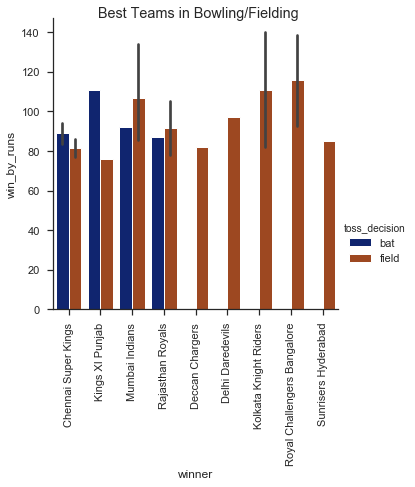

In [389]:
sns.set(style="ticks")
ax = sns.catplot(x="winner", y="win_by_runs", hue="toss_decision", data=best_bowling_teams,kind="bar",palette="dark")
ax.fig.suptitle('Best Teams in Bowling/Fielding')
for ax in ax.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Observation :
    
- Eventhough __toss decision__ was __batting__ , have __lost__ to these __teams__ as they are __best__ in __bowling__. Before the opposing team could reach the target score, these teams put down their wickets and send back to home.


- These teams have good bowlers in their team to make them daring to the other teams. 

### 4.7 Which is the most dangerous batting teams to play with ?

In [390]:
best_batting_teams = grouped_winrate[grouped_winrate.win_by_wickets >8][['toss_decision','winner','win_by_wickets']]
list(best_batting_teams.winner.unique())

['Chennai Super Kings',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Deccan Chargers']

The above teams are dangerous when they are batting. Royal Challenger Bangalore have won by more than 8 wickets 11 times,which is an extra ordinary performance. They might have the best batters in their team. 

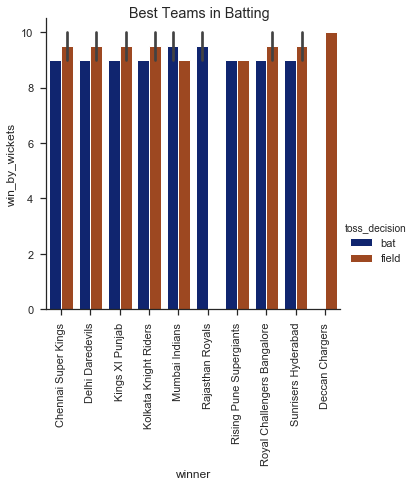

In [391]:
sns.set(style="ticks")
ax = sns.catplot(x="winner", y="win_by_wickets", hue="toss_decision", data=best_batting_teams,kind="bar",palette="dark")
ax.fig.suptitle('Best Teams in Batting')
for ax in ax.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Observations :
    
- Eventhough the __toss decision__ was __fielding__, these extra ordinary team have reached the __target score without losing much wickets__. They have extra ordinary batsmen which make them best batting team.

### 4.8 Which is the overall BEST teams in the history of IPL ?

In [392]:
best_teams = pd.merge(best_bowling_teams,best_batting_teams,how='inner',on='winner')
best = list(best_teams.winner.unique())
best

['Chennai Super Kings',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Delhi Daredevils',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

We could say, undoudtedly that these are __BEST TEAMS__ both in batting and bowling. 

### 4.9 What is the probability of winning if the opposite team is one among the best teams?

In [27]:
matches.columns

Index(['id', 'season', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [396]:
total_win=0
total = 0

for team1,team2,win in zip(matches.team1,matches.team2,matches.winner) :
    if team1 in best :
        total += 1
        if (team2 not in best)&(team2 == win) :
            #print("hi")
            total_win += 1 
    if team2 in best :
        total+=1
        #print("hi")
        if (team1 not in best) & (team1 == win) :
            total_win += 1
            
print("Probability of Winning when the opposing team is strong is ",(total_win/total)*100)

Probability of Winning when the opposing team is strong is  3.235990528808208


We could see that __probability of winning__ for __average performing__ teams when the __opposition team__ is one amoung __best teams__ is as low as __4.6%__

### 4.10 Does climate have any effect on the match flow?

In [317]:
matches.dl_applied.value_counts()

0    674
1     19
Name: dl_applied, dtype: int64

__19 match results__ were based on __DL Rule__ due to __bad weather__ condition. 

**DL Rule - __Duckworth-Lewis-Stern__ Method is a mathematical formulation designed to calculate the target score for the team bating second in a limited overs cricket match interrupted by weather or other circumstances. Its generally accpeted  to be the most accurate method of setting a target 

In [327]:
grouped_dlrule = matches.groupby(['dl_applied','venue','toss_decision','win_by_runs','win_by_wickets','season','date','toss_winner','winner']).count().reset_index()
grouped_dlrule.head(2)

,dl_applied,venue,toss_decision,win_by_runs,win_by_wickets,season,date,toss_winner,winner,id,team1,team2,result,player_of_match,Most Valuable players
0,0,Barabati Stadium,bat,10,0,2010,2010-03-21,Deccan Chargers,Deccan Chargers,1,1,1,1,1,1
1,0,Barabati Stadium,bat,13,0,2012,2012-05-01,Deccan Chargers,Deccan Chargers,1,1,1,1,1,1


In [328]:
matches_dlrule = grouped_dlrule[(grouped_dlrule.dl_applied==1) & (grouped_dlrule.toss_winner == grouped_dlrule.winner)][['venue','toss_decision','win_by_runs','win_by_wickets','season','date']]
list(matches_dlrule.venue.unique())

['Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Eden Gardens',
 'Feroz Shah Kotla',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'Nehru Stadium',
 'Newlands',
 'Rajiv Gandhi International Stadium, Uppal',
 'SuperSport Park']

In [329]:
matches_dlrule.head(2)

,venue,toss_decision,win_by_runs,win_by_wickets,season,date
675,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,field,19,0,2016,2016-05-17
679,Eden Gardens,field,0,9,2018,2018-04-21


Matches held on these venues, have applied DL Rule to determine the result. Now, we will see, which toss decision will get benefited out of this. 

In [341]:
matches_dlrule.toss_decision.value_counts()

field    9
bat      1
Name: toss_decision, dtype: int64

__90%__ times, those teams who have decided to __field__ first have __benifited__ from the DL_Rule. 

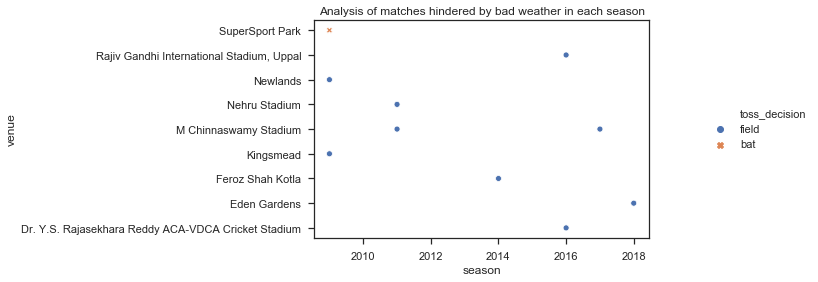

In [349]:
ax = sns.scatterplot(x="season", y="venue", hue="toss_decision",style="toss_decision",data=matches_dlrule)
ax.set_title('Analysis of matches hindered by bad weather in each season')
ax.legend(loc='center right',bbox_to_anchor=(1.50, 0.5), ncol=1)


Observations :
    
- In the year __2009__, __3 times__ DL Rule was applied to calculate the target score due to bad weather. 


- No trend in repeatation of bad weather in any of the venues in these 10 seasons. 

### 4.11 Hypothesis: Factors that effect the IPL match result

After a deep analysis on the IPL data of  years, before each match, teams can decide on few factors and can boost their chances of winning the match. Few of the factors are:

- There were an increase in number of matches between the years, 2011-2013 due to increase in number of teams. But they failed to show a consistency in the tournament, which resulted in wipping out from the IPL tournament itself. Thus only, eventhough its a commercial tournament, __consistent perfomance is the Key__. 


- There are few valubale players who belongs to the Best teams gives consistent extra ordinary perfomance which is one of reasons being the Best teams. They are definitely an asset to the team.


- Eventhough, toss decision have around 50% chance of winning, still teams who have decided to __bowl__ first have around __60%__ more change to __win__. 


-  Another factor to the toss decision which is the venue. Few venues are batting pitch and few are bowling pitch. If toss decision taken correctly according to the venue,the probability of winning is more. 


- During __bad weather__, when the DL Rule is applied over the match, the teams who have decided __first to bowl__ will be benifited 90% more than those who have decided to bat.


- Probability of winning when the opposing team is one amoung the best teams in IPL is low as 3.2%.


- Thus, to conclude: __teams, players,toss decision and weather__ do play an __important role__ in deciding the winner of the match. 


**Details of players of each team, runs taken by each team & each player, Owner & Stakeholder information of each team would have added to a better analysis. 

## 5. Conclusion 

Winner of each IPL Tournament is a result of several layers of decisions. 

- Starting from the __Auction__, Owners should be ready to take ownership of the team and take in the best players into the team.


- __Captain__ have a major role, as he is the one who decides during the __toss__. A Deep Analysis of the __venue, the opposition team, the players and climate__ would definitely add to a __better toss decision__.


- Deeper analysis on the previous matches would give a better decision on the order of players and several other factors which is out of scope of this analysis.  